(b) Define the p.d.f.s and verify the normalisation.

In [6]:
from fit_methods import PDF

# verify with default parameters
print("Verify normalisation with default parameters:")
results = PDF().verify()

# verify with different parameters
test_params = [ {'mu': 2.5, 'beta': 2.0, 'f': 0.4, 'mu_b': 0.5},
                {'lamda': 0.5, 'sigma': 0.8, 'm':2.5, 'lamda': 0.5, 'mu_b': 1.3, 'sigma_b': 2.1}]
    
for i, params in enumerate(test_params, 1):
    print(f"\nVerify normalisation with parameters group {i}:")
    results = PDF(**params).verify()

Verify normalisation with default parameters:
g_s(x) pdf integral: 1.0000
h_s(y) pdf integral: 1.0000
g_b(x) pdf integral: 1.0000
h_b(y) pdf integral: 1.0000
signal pdf integral: 1.0000
background integral: 1.0000
mixted pdf integral: 1.0000

Verify normalisation with parameters group 1:
g_s(x) pdf integral: 1.0000
h_s(y) pdf integral: 1.0000
g_b(x) pdf integral: 1.0000
h_b(y) pdf integral: 1.0000
signal pdf integral: 1.0000
background integral: 1.0000
mixted pdf integral: 1.0000

Verify normalisation with parameters group 2:
g_s(x) pdf integral: 1.0000
h_s(y) pdf integral: 1.0000
g_b(x) pdf integral: 1.0000
h_b(y) pdf integral: 1.0000
signal pdf integral: 1.0000
background integral: 1.0000
mixted pdf integral: 1.0000


(c) Plot the distributions.

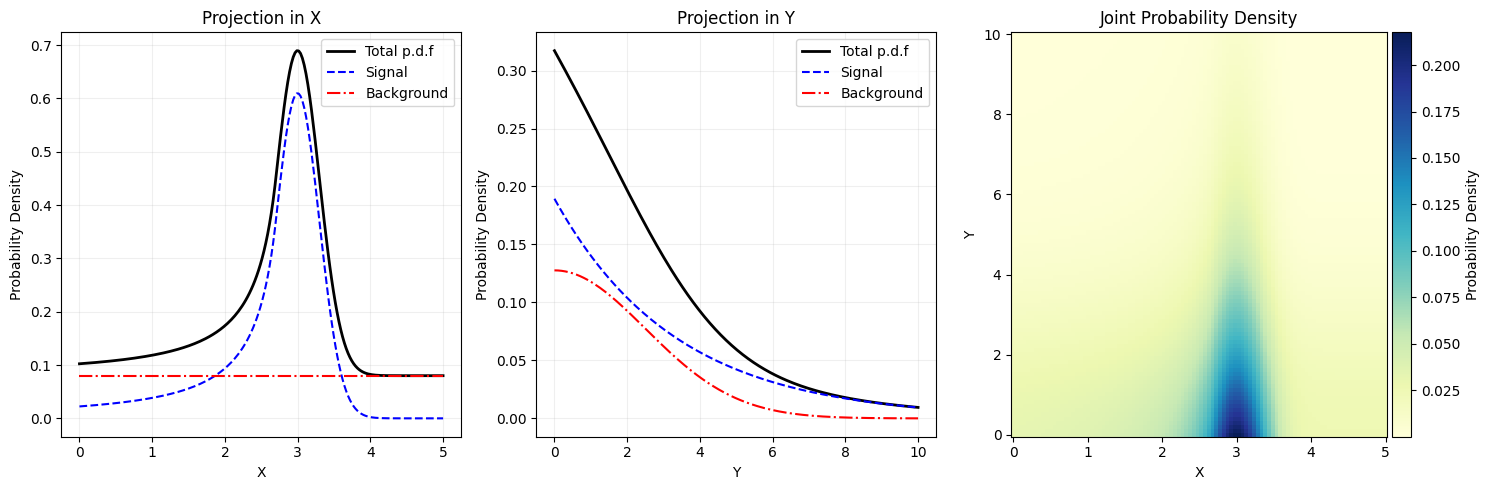

In [4]:
from fit_methods import PDF
import matplotlib.pyplot as plt

fig = PDF().plot()
plt.show()

(d) Generate the samples and perform an extended maximum likelihood fit.

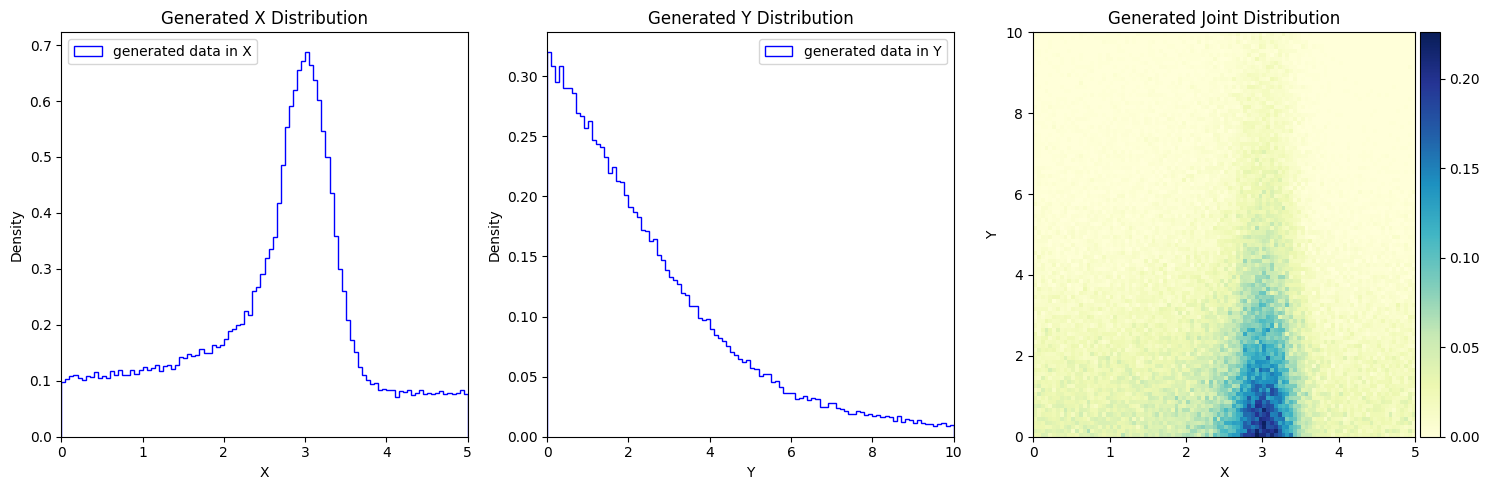

In [ ]:
from fit_methods import Generator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

params = np.array([3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5])
generator = Generator(params)
x, y = generator.generate_sample(100000)

fig = plt.figure(figsize=(15, 5))
# ------------------------- X projection --------------------- #
ax1 = plt.subplot(131)
ax1.hist(x, bins=100, range=(0,5), density=True, histtype='step', label='generated data in X', color='blue')
ax1.set_xlabel('X')
ax1.set_ylabel('Density')
ax1.set_title('Generated X Distribution')
ax1.set_xlim(0, 5)
ax1.legend()

# -------------------------  Y projection --------------------- #
ax2 = plt.subplot(132)
ax2.hist(y, bins=100, range=(0,10), density=True, histtype='step', label='generated data in Y', color='blue')
ax2.set_xlabel('Y')
ax2.set_ylabel('Density')
ax2.set_title('Generated Y Distribution')
ax2.set_xlim(0, 10)
ax2.legend()

# -------------------------  2D joint distribution --------------------- #
ax3 = plt.subplot(133)
h = ax3.hist2d(x, y, bins=100, range=[[0, 5], [0, 10]], density=True, cmap='YlGnBu')     
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h[3], cax=cax)        
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Generated Joint Distribution')

plt.tight_layout()
plt.show()



In [ ]:
from fit_methods import Generator, Fitte
import numpy as np
# ------------------ generation ------------------- #
params = np.array([3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5])
generator = Generator(params)
x, y = generator.generate_sample(100000)

# -------------------- fitting --------------------- #
fitter = Fitter(x, y)
result = fitter.fit()

# --------------------- print ---------------------- #
param_names = ['μ', 'sigma', 'β', 'm', 'f', 'λ', 'μ_b', 'sigma_b', 'N']
print(f"{'Parameter':<10} {'Estimate':>10} {'Uncertainty':>12} {'True Value':>12} ")
print("-" * 48)
for i, (name, est, err, true) in enumerate(zip(param_names, result[0], result[1], list(params) + [100000])):                                          
    print(f"{name:<10} {est:>10.4f} ± {err:>10.4f} {true:>12.4f}")


Parameter    Estimate  Uncertainty   True Value 
------------------------------------------------
μ              3.0018 ±     0.0037       3.0000
sigma          0.2980 ±     0.0035       0.3000
β              0.9924 ±     0.0311       1.0000
m              1.4200 ±     0.0886       1.4000
f              0.5962 ±     0.0050       0.6000
λ              0.2994 ±     0.0029       0.3000
μ_b           -0.0079 ±     0.1113       0.0000
sigma_b        2.5130 ±     0.0515       2.5000
N          100000.0800 ±   447.2136  100000.0000


In [4]:
from fit_methods import Generator, Fitter
import timeit
import numpy as np

n = 100000    # sample size
trials = 100  # number of calls
params = np.array([3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5])  # model params

# ------------------ normal distribution ------------------- #
normal_time = timeit.timeit(
    'np.random.normal(size=100000)',
    number=trials,
    globals={'np': np}) / trials

# ------------------- sample generation -------------------- #
generator = Generator(params)
gen_time = timeit.timeit(
    'generator.generate_sample(n)',
    number=trials,
    globals={'generator': generator, 'n': n}) / trials

# ------------------------ fitting -------------------------- #
x, y = generator.generate_sample(n)
fitter = Fitter(x, y)
fit_time = timeit.timeit(
    'fitter.fit()',
    number=trials,
    globals={'fitter': fitter, 'params': params}) / trials

# ------------------------ result -------------------------- #
print("\nThe execution times:")
print(f"Normal distribution: {normal_time:.4f} seconds")
print(f"Sample generation: {gen_time:.4f} seconds "
        f"({gen_time / normal_time:.2f}x first one)")
print(f"Parameter fitting: {fit_time:.4f} seconds "
        f"({fit_time / normal_time:.2f}x first one)")


The execution times:
Normal distribution: 0.0015 seconds
Sample generation: 0.0190 seconds (12.65x first one)
Parameter fitting: 5.8407 seconds (3893.89x first one)


(e) Run a simulation study using parametric bootstrapping.

d:\python\Lib\site-packages\scipy\stats\_continuous_distns.py:11364: RuntimeWarning: overflow encountered in power
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
d:\python\Lib\site-packages\scipy\stats\_continuous_distns.py:11332: RuntimeWarning: overflow encountered in power
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
d:\Cambridge\Scousework\s1_project\src\fitting\fitter.py:51: RuntimeWarning: invalid value encountered in divide
  signal_x = stats.crystalball.pdf(self.x, beta, m, loc=mu, scale=sigma) / cb_nor
d:\python\Lib\site-packages\scipy\stats\_continuous_distns.py:11364: RuntimeWarning: invalid value encountered in multiply
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
d:\python\Lib\site-packages\scipy\stats\_continuous_distns.py:11332: RuntimeWarning: invalid value encountered in multiply
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
d:\Cambridge\Scousework\s1_project\src\fitting\fitter.py:29: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-lambda_

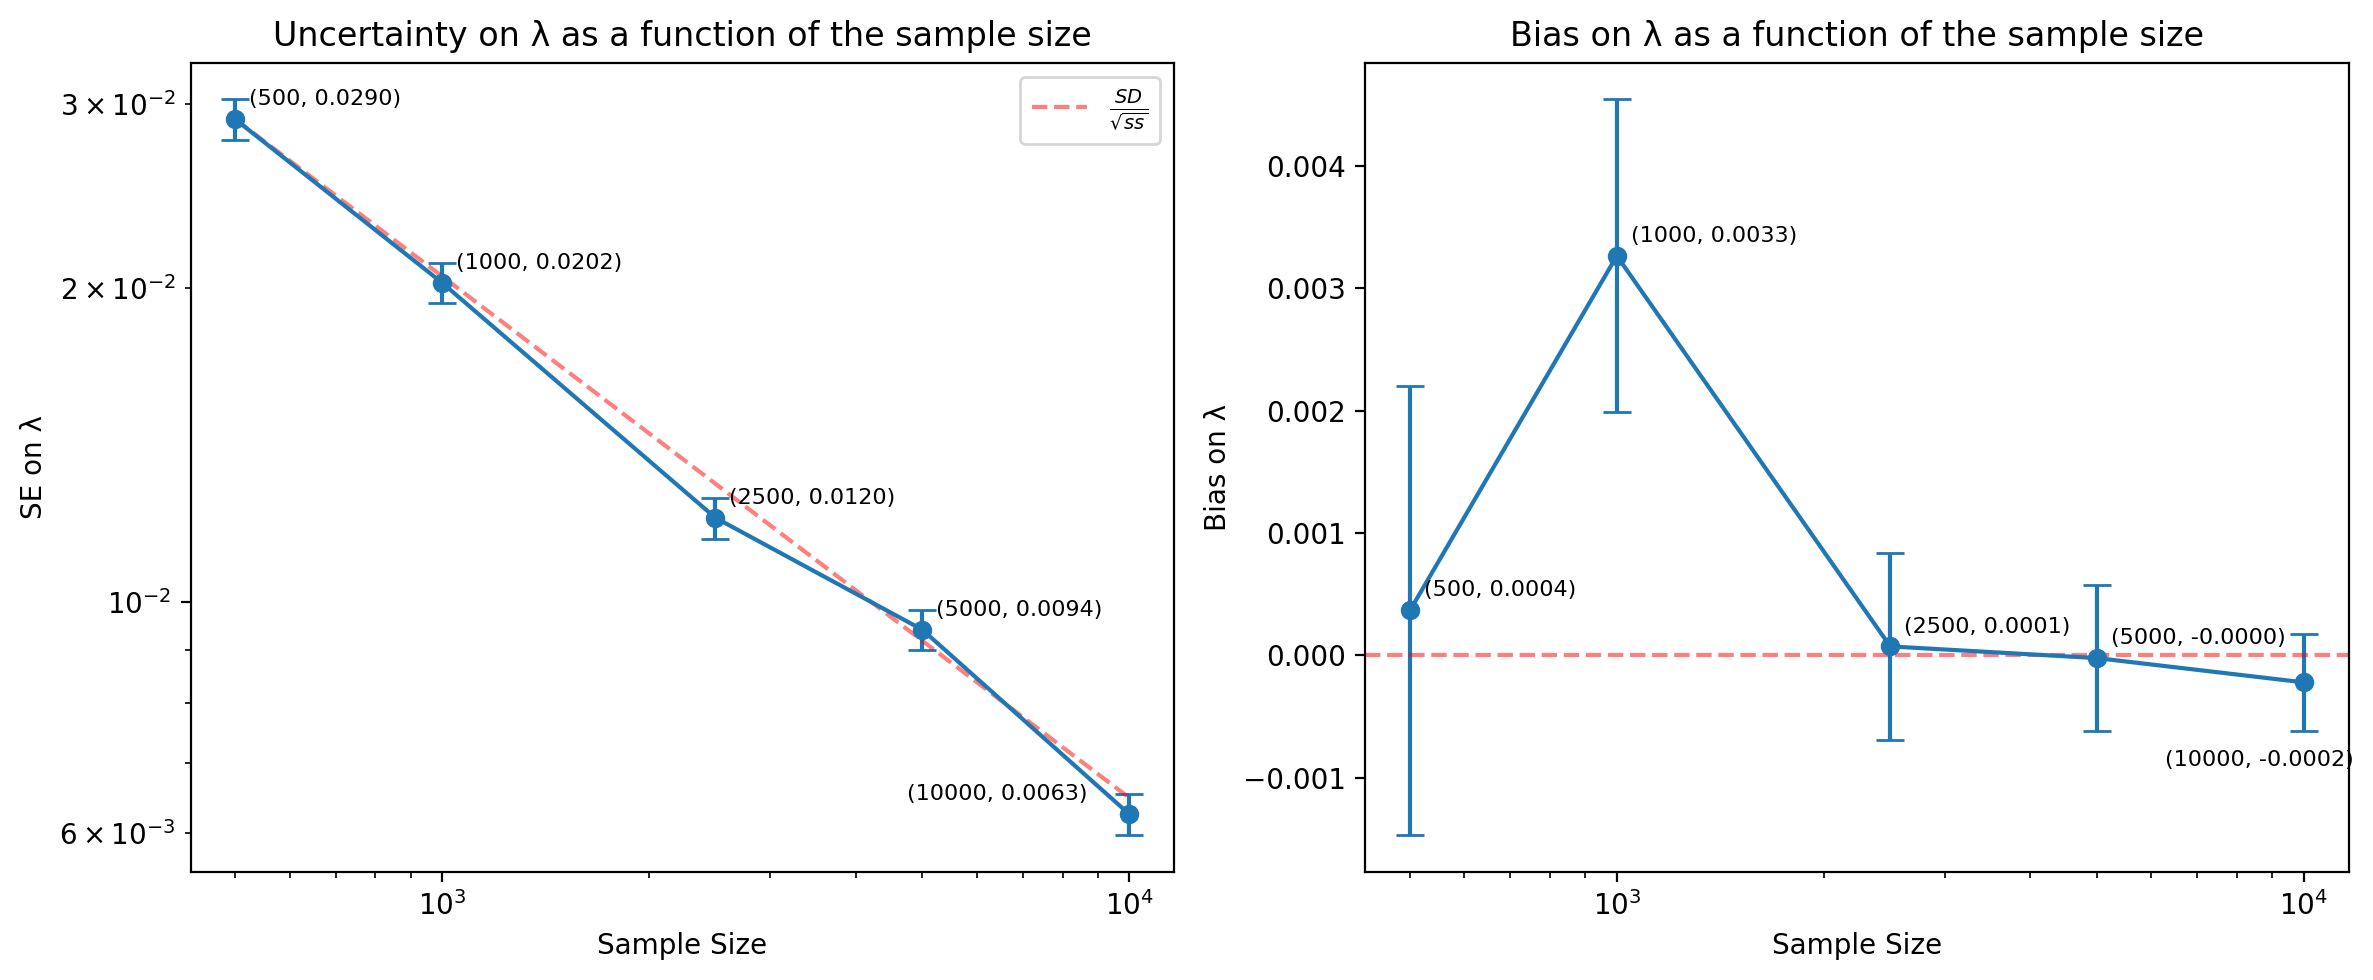

In [1]:
from fit_methods import Bootstrap
import matplotlib.pyplot as plt
import numpy as np

true_params = np.array([3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5])

# run bootstrap
results = Bootstrap(true_params).toy_study()

# 5 uncertaintis of lambda
Bootstrap(true_params).uncertainties(results)

plt.show()

(f) Perform the *sWeight*.

In [6]:
from fit_methods import Generator, Sweightor

true_params = [3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5]
x, y = Generator(true_params).generate_sample(100000)

result = Sweightor(x, y).do_sWeight(true_params[5])

    PDF normalisations:
	 0 1.0000000001467886
	 1 1.0000000000000002
    Integral of w*pdf matrix (should be close to the
                identity):
	[[ 1.00004720e+00 -3.53131406e-05]
	 [-3.82540241e-05  1.00002462e+00]]
    Check of weight sums (should match yields):
	Component  | sWeightSum |   Yield    |   Diff    |
	---------------------------------------------------
	  0        | 60030.0180 | 60030.0180 |     0.00% |
	  1        | 39970.0918 | 39970.0918 |    -0.00% |


    PDF normalisations:
	 0 1.0000000001631473
	 1 1.0000000000000002
    Integral of w*pdf matrix (should be close to the
                identity):
	[[ 1.00010971e+00 -1.85952565e-04]
	 [-1.13097265e-04  1.00019457e+00]]
    Check of weight sums (should match yields):
	Component  | sWeightSum |   Yield    |   Diff    |
	---------------------------------------------------
	  0        | 60334.9993 | 60334.9993 |    -0.00% |
	  1        | 39665.1382 | 39665.1382 |     0.00% |


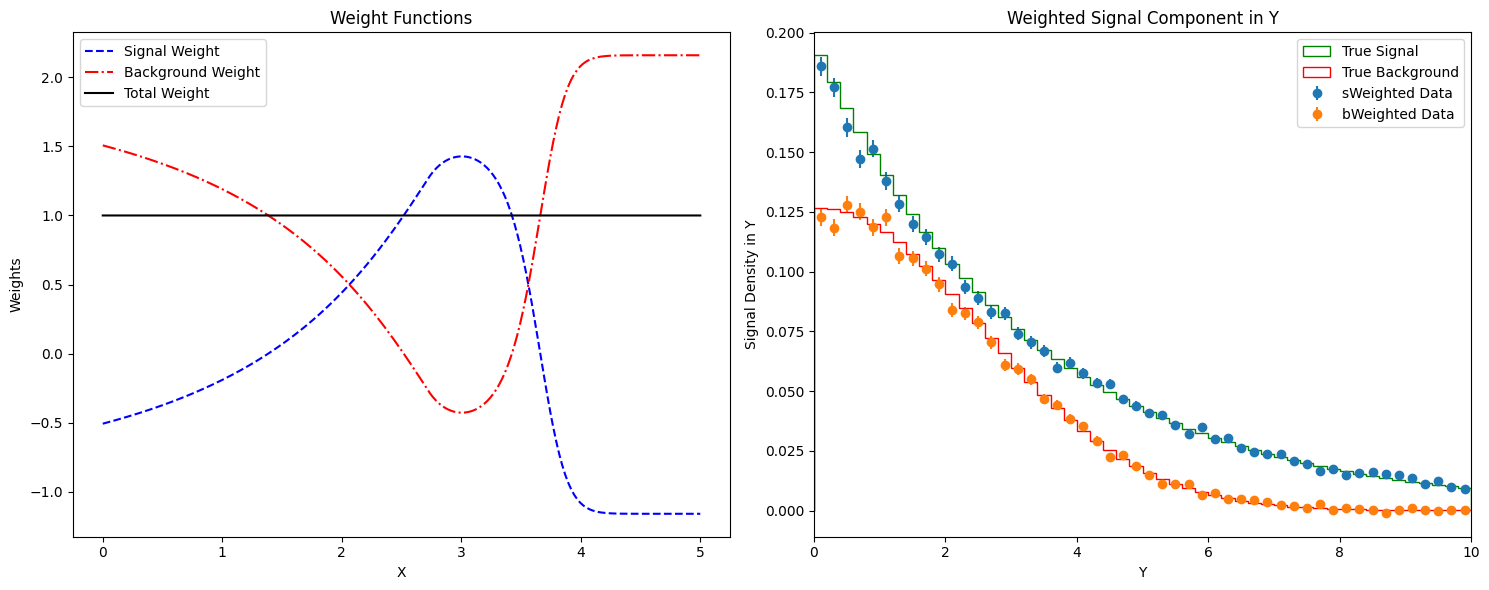


sWeights Analysis Results:
True λ: 0.3000
Estimated λ: 0.2993 ± 0.0024
Bias: -0.0007


In [2]:
Sweightor(x, y).plot_results(result, true_params)

print("\nsWeights Analysis Results:")
print(f"True λ: {true_params[5]:.4f}")
print(f"Estimated λ: {result.lambda_est:.4f} ± {result.lambda_err:.4f}")
print(f"Bias: {result.bias:.4f}")